In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# file path
file_path = r'D:\Projects\DataAnalystProjects\2023-24 Conditional Formatting Cards\TeamCard23-24.csv'

# Read data from CSV file
data = pd.read_csv(file_path)

# Code for single team selection 
# Define function to plot data for a selected team
def plot_team(team_name):
    team_data = data[data['Team'] == team_name].squeeze()  # Get data for the selected team
    categories = list(team_data.index)[1:]  # Exclude 'Team' 
    values = team_data.values[1:]  # Exclude 'Team' 

    # Create scatter plot with circles as markers
    fig, ax = plt.subplots(figsize=(10, 6))
    scatter = ax.scatter(categories, values, color='black', s=1000)  # Circles as markers
    ax.set_title(f'{team_name}')
    ax.set_ylabel('League Rank')
    ax.set_xlabel('Metrics')
    ax.set_ylim(-1, 34)  # Set y-axis limits
    ax.invert_yaxis()  # Invert y-axis to display 32 at the bottom and 1 at the top
    plt.xticks(rotation=45, ha='right')

    # Add white labels inside circles
    for i, txt in enumerate(values):
        ax.text(categories[i], values[i], str(txt), color='white', va='center', ha='center', weight='bold', size=12)
        
     # Add lines connecting the markers
    for i in range(len(categories) - 1):
        ax.plot([categories[i], categories[i+1]], [values[i], values[i+1]], color='black')

    plt.show()

# Main code
if __name__ == "__main__":
    teams = data['Team'].tolist()  # Get list of teams
    print("Available Teams:")
    for idx, team in enumerate(teams, 1):
        print(f"{idx}. {team}")
    
    while True:
        try:
            choice = int(input("Enter the number of the team to display (or 0 to exit): "))
            if choice == 0:
                print("Exiting...")
                break
            elif 1 <= choice <= len(teams):
                selected_team = teams[choice - 1]
                plot_team(selected_team)
            else:
                print("Invalid choice. Please enter a number within the range.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

Available Teams:
1. Anaheim Ducks
2. Arizona Coyotes
3. Boston Bruins
4. Buffalo Sabres
5. Calgary Flames
6. Carolina Hurricanes
7. Chicago Blackhawks
8. Colorado Avalanche
9. Columbus Blue Jackets
10. Dallas Stars
11. Detroit Red Wings
12. Edmonton Oilers
13. Florida Panthers
14. Los Angeles Kings
15. Minnesota Wild
16. Montreal Canadiens
17. Nashville Predators
18. New Jersey Devils
19. New York Islanders
20. New York Rangers
21. Ottawa Senators
22. Philadelphia Flyers
23. Pittsburgh Penguins
24. San Jose Sharks
25. Seattle Kraken
26. St Louis Blues
27. Tampa Bay Lightning
28. Toronto Maple Leafs
29. Vancouver Canucks
30. Vegas Golden Knights
31. Washington Capitals
32. Winnipeg Jets


KeyboardInterrupt: Interrupted by user

Available Teams:
1. Anaheim Ducks
2. Arizona Coyotes
3. Boston Bruins
4. Buffalo Sabres
5. Calgary Flames
6. Carolina Hurricanes
7. Chicago Blackhawks
8. Colorado Avalanche
9. Columbus Blue Jackets
10. Dallas Stars
11. Detroit Red Wings
12. Edmonton Oilers
13. Florida Panthers
14. Los Angeles Kings
15. Minnesota Wild
16. Montreal Canadiens
17. Nashville Predators
18. New Jersey Devils
19. New York Islanders
20. New York Rangers
21. Ottawa Senators
22. Philadelphia Flyers
23. Pittsburgh Penguins
24. San Jose Sharks
25. Seattle Kraken
26. St Louis Blues
27. Tampa Bay Lightning
28. Toronto Maple Leafs
29. Vancouver Canucks
30. Vegas Golden Knights
31. Washington Capitals
32. Winnipeg Jets
Enter the number of Team 1 to display (or 'x' to exit second team option): 27
Enter the number of Team 2 to display (or 'x' to exit second team option): 20


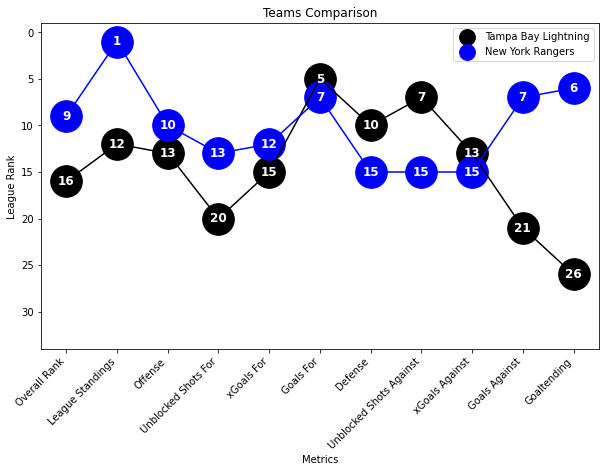

In [10]:
# Code for two team selection 
# Define function to plot data for selected teams
def plot_teams(team_names):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_ylabel('League Rank')
    ax.set_xlabel('Metrics')
    ax.set_ylim(-1, 34)  # Set y-axis limits
    ax.invert_yaxis()  # Invert y-axis to display 32 at the bottom and 1 at the top
    plt.xticks(rotation=45, ha='right')

    colors = ['black', 'blue']

    for team_name, color in zip(team_names, colors):
        team_data = data[data['Team'] == team_name].squeeze()  # Get data for the selected team
        categories = list(team_data.index)[1:]  # Exclude 'Team' 
        values = team_data.values[1:]  # Exclude 'Team' 

        # Create scatter plot with circles as markers
        scatter = ax.scatter(categories, values, s=1000, label=team_name, color=color)

        # Add white labels inside circles
        for i, txt in enumerate(values):
            ax.text(categories[i], values[i], str(txt), color='white', va='center', ha='center', weight='bold', size=12)

        # Add lines connecting the markers
        for i in range(len(categories) - 1):
            ax.plot([categories[i], categories[i+1]], [values[i], values[i+1]], color=color)

    ax.set_title('Teams Comparison')
    ax.legend(markerscale=0.5)
    plt.show()

# Main code
if __name__ == "__main__":
    teams = data['Team'].tolist()  # Get list of teams
    print("Available Teams:")
    for idx, team in enumerate(teams, 1):
        print(f"{idx}. {team}")
    
    selected_teams = []
    while len(selected_teams) < 2:
        try:
            choice = input(f"Enter the number of Team {len(selected_teams) + 1} to display (or 'x' to exit second team option): ")
            if choice.lower() == 'x':
                if len(selected_teams) == 1:
                    print("Exiting second team option...")
                    break
                else:
                    print("You need to select at least one team.")
                    continue
            choice = int(choice)
            if 1 <= choice <= len(teams):
                selected_team = teams[choice - 1]
                selected_teams.append(selected_team)
            else:
                print("Invalid choice. Please enter a number within the range.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    if len(selected_teams) >= 1:
        plot_teams(selected_teams)